Text(0, 0.5, 'Top 5% Citation Rate')

<Figure size 1000x600 with 0 Axes>

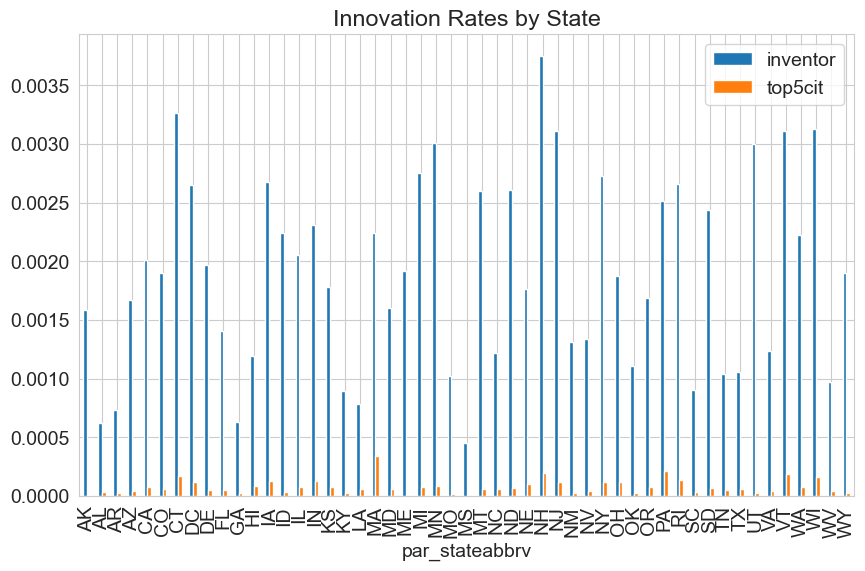

<Figure size 1000x800 with 0 Axes>

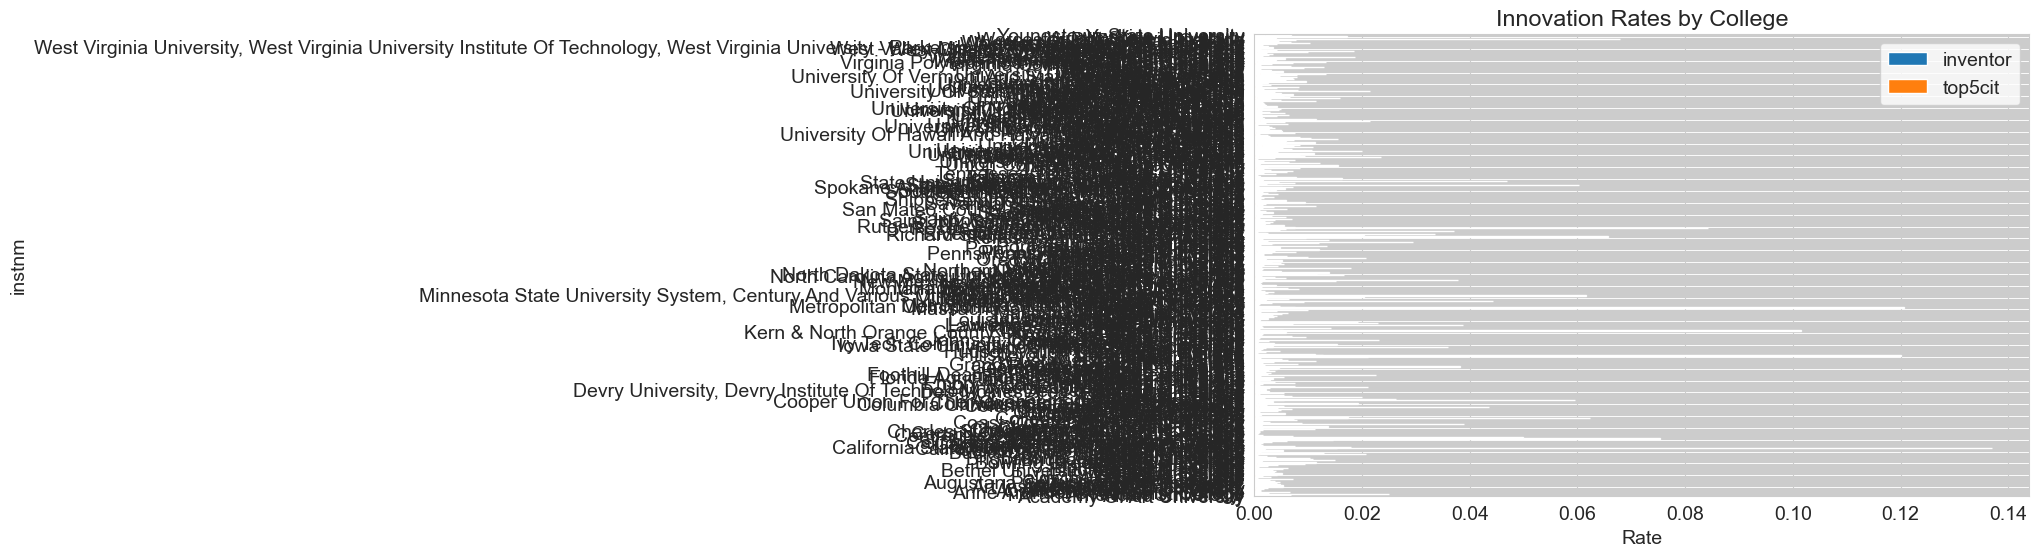

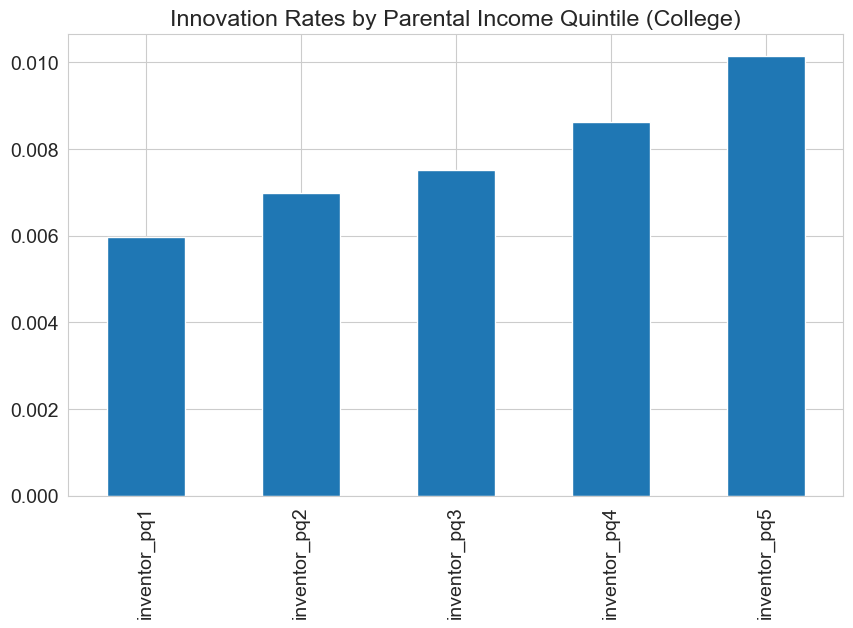

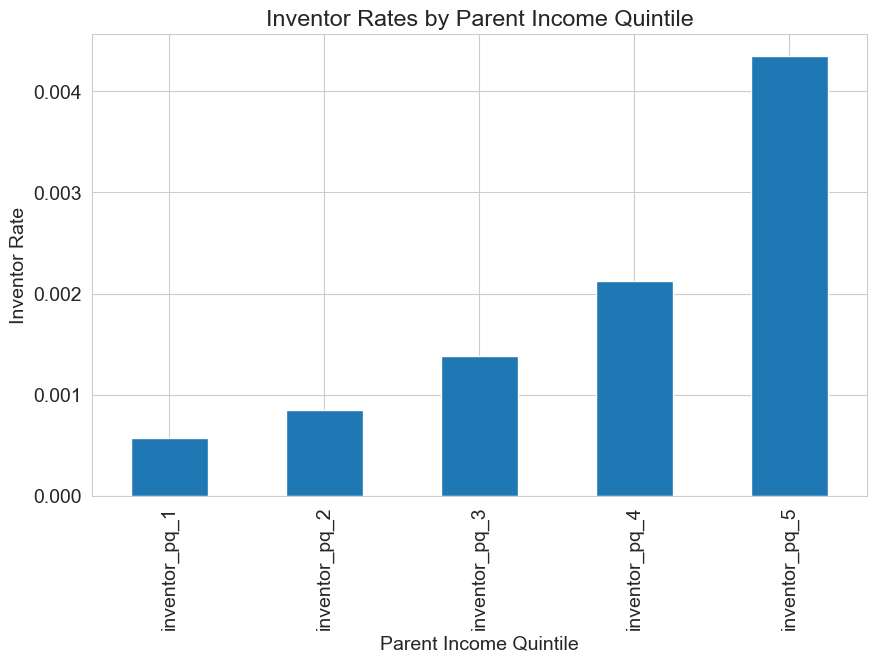

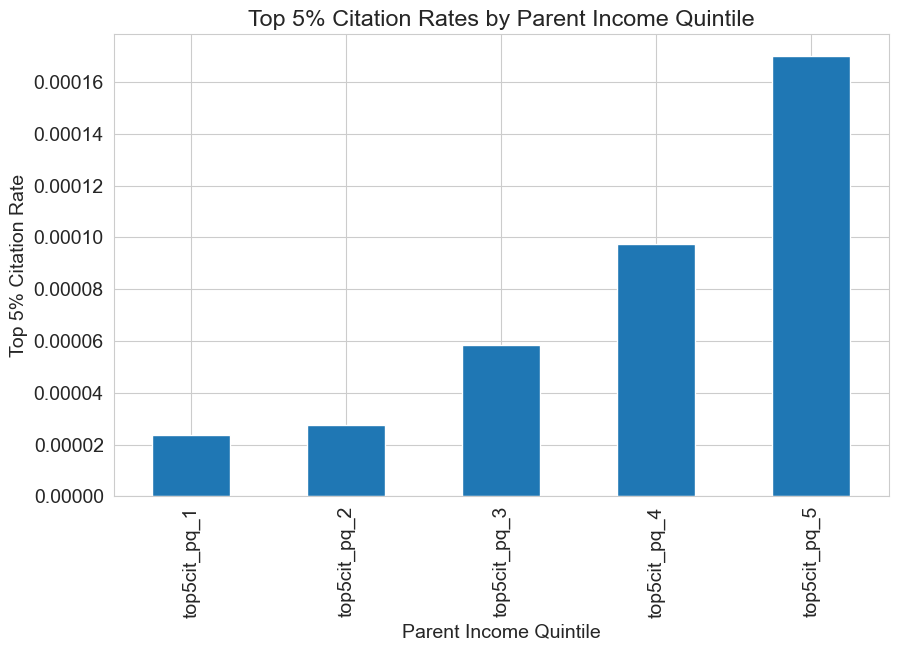

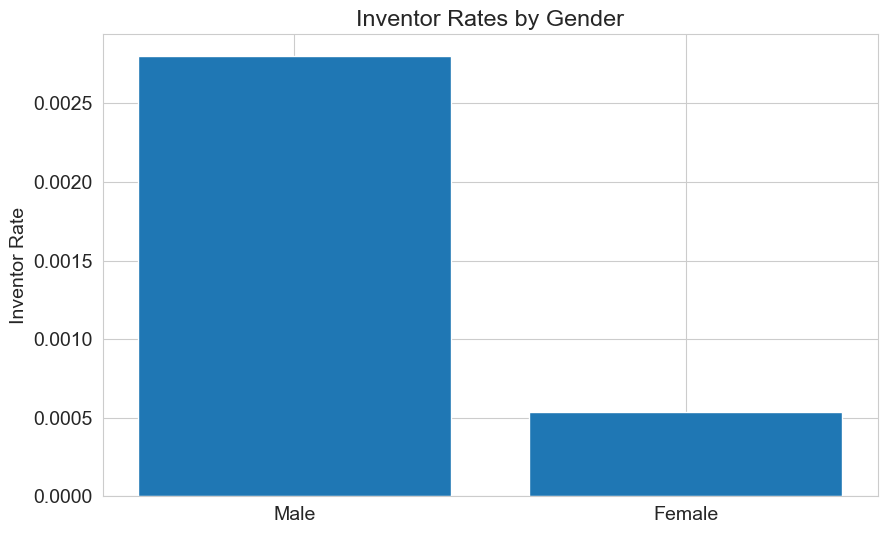

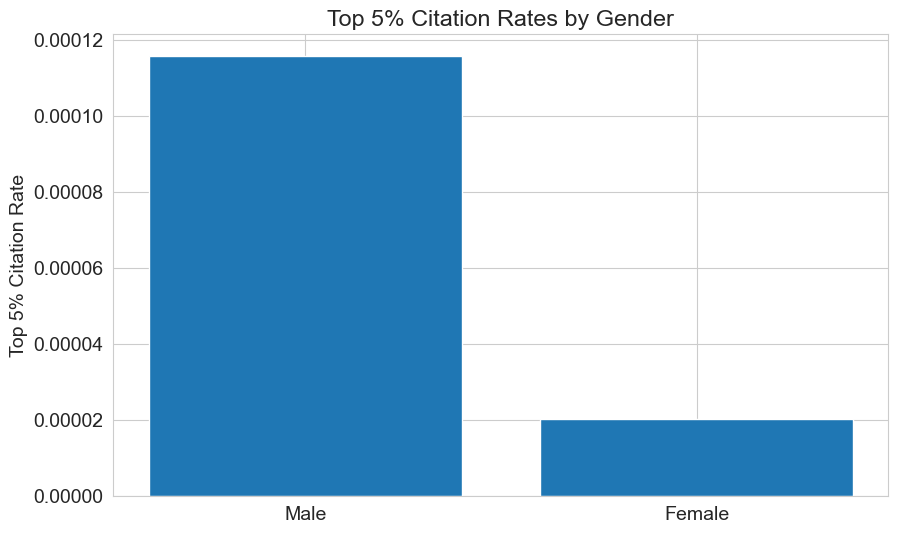

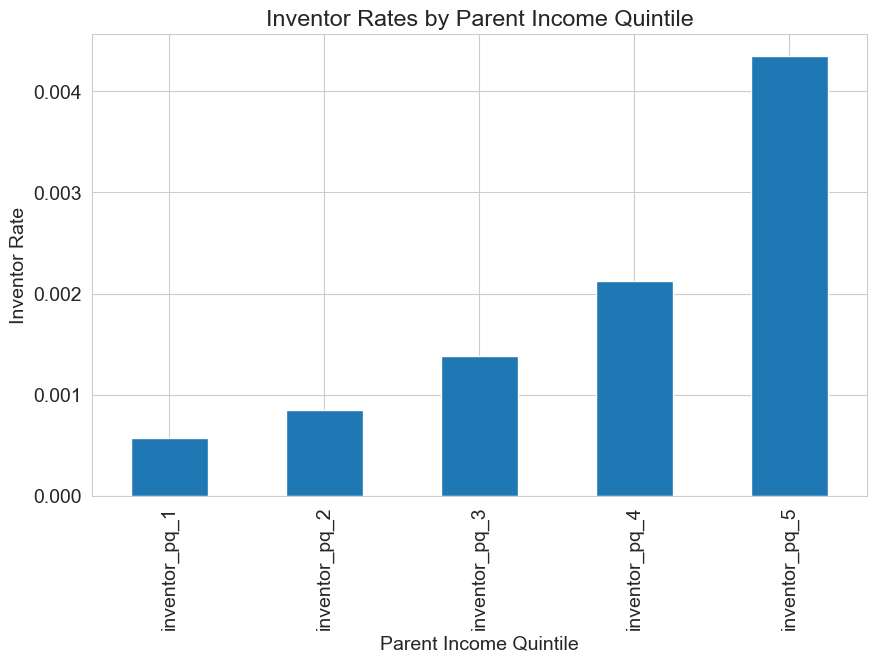

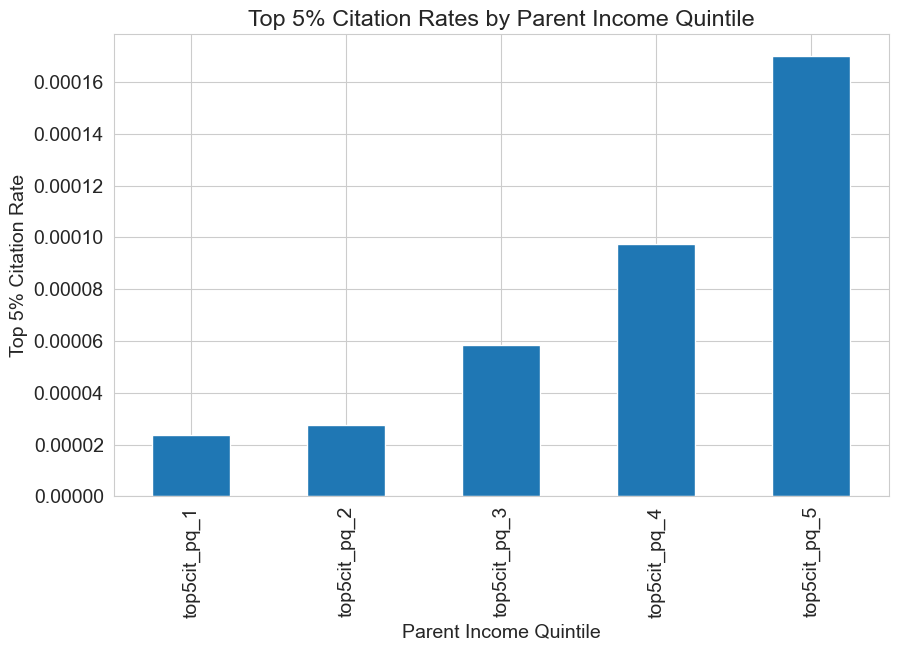

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Load data tables
table1 = pd.read_csv('./code_and_data/data/excel/table_1a.csv')
table3 = pd.read_csv('./code_and_data/data/excel/table_3.csv') 
table4a = pd.read_csv('./code_and_data/data/excel/table_4a.csv')
table4b = pd.read_csv('./code_and_data/data/excel/table_4b.csv')

# Analysis using Table 1
plt.figure()
table1.groupby('par_stateabbrv')[['inventor', 'top5cit']].mean().plot.bar()
plt.title('Innovation Rates by State')

# Extract data by parent income quintile from Table 1a
inventor_pq_data = table1[[col for col in table1.columns if col.startswith('inventor_pq_')]]
top5cit_pq_data = table1[[col for col in table1.columns if col.startswith('top5cit_pq_')]]

# Plot inventor rates by parent income quintile
plt.figure()
inventor_pq_data.mean().plot.bar()
plt.title('Inventor Rates by Parent Income Quintile')
plt.xlabel('Parent Income Quintile')
plt.ylabel('Inventor Rate')

# Plot top5cit rates by parent income quintile
plt.figure()
top5cit_pq_data.mean().plot.bar()
plt.title('Top 5% Citation Rates by Parent Income Quintile')
plt.xlabel('Parent Income Quintile')
plt.ylabel('Top 5% Citation Rate')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set matplotlib parameters for prettier charts
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14
sns.set_style("whitegrid")

# Extract data by gender from Table 1a
gender_data = table1[['inventor_g_m', 'inventor_g_f', 'top5cit_g_m', 'top5cit_g_f']]
gender_data = gender_data.rename(columns={'inventor_g_m': 'inventor_male', 'inventor_g_f': 'inventor_female',
                                          'top5cit_g_m': 'top5cit_male', 'top5cit_g_f': 'top5cit_female'})

# Calculate summary statistics for innovation rates by gender
gender_data = table1[['inventor_g_m', 'inventor_g_f', 'top5cit_g_m', 'top5cit_g_f']]
gender_data = gender_data.rename(columns={'inventor_g_m': 'inventor_male', 'inventor_g_f': 'inventor_female',
                                          'top5cit_g_m': 'top5cit_male', 'top5cit_g_f': 'top5cit_female'})

# Create a bar chart for inventor rates by gender
plt.figure()
inventor_rates = [gender_data['inventor_male'].mean(), gender_data['inventor_female'].mean()]
plt.bar(['Male', 'Female'], inventor_rates)
plt.title('Inventor Rates by Gender')
plt.ylabel('Inventor Rate')

# Create a bar chart for top5cit rates by gender
plt.figure()
top5cit_rates = [gender_data['top5cit_male'].mean(), gender_data['top5cit_female'].mean()]
plt.bar(['Male', 'Female'], top5cit_rates)
plt.title('Top 5% Citation Rates by Gender')
plt.ylabel('Top 5% Citation Rate')

# Extract data by parent income quintile from Table 1a
income_data = table1[[col for col in table1.columns if col.startswith('inventor_pq_') or col.startswith('top5cit_pq_')]]

# Calculate summary statistics for innovation rates by parent income quintile
# Extract data by parent income quintile from Table 1a
inventor_pq_data = table1[[col for col in table1.columns if col.startswith('inventor_pq_')]]
top5cit_pq_data = table1[[col for col in table1.columns if col.startswith('top5cit_pq_')]]

# Plot inventor rates by parent income quintile
plt.figure()
inventor_pq_data.mean().plot.bar()
plt.title('Inventor Rates by Parent Income Quintile')
plt.xlabel('Parent Income Quintile')
plt.ylabel('Inventor Rate')

# Plot top5cit rates by parent income quintile
plt.figure()
top5cit_pq_data.mean().plot.bar()
plt.title('Top 5% Citation Rates by Parent Income Quintile')
plt.xlabel('Parent Income Quintile')
plt.ylabel('Top 5% Citation Rate')

In [14]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip
